# CAR PRICE DETECTION MODEL

##### Problem: Predict the price of car using the data provided

### 1. Load import modules

In [1]:
import numpy as np
import pandas as pd

### 2. Load the automobile price dataset

In [2]:
data = pd.read_csv('auto_mobile_data.csv')
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
columns = data.columns
columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', ' width', 'height', 'curb-weight',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

#### 2.01 change the column names

In [4]:
# Replace '-' with '_' in the column names
data.columns = data.columns.str.replace('-', '_')
data.columns = data.columns.str.replace(' ', '')

In [5]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

### 3. Change the price, normalized_losses, bore, stroke, horsepower, peak_rpm to numeric value

In [6]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['normalized_losses'] = pd.to_numeric(data['normalized_losses'], errors='coerce')
data['bore'] = pd.to_numeric(data['bore'], errors='coerce')
data['stroke'] = pd.to_numeric(data['stroke'], errors='coerce')
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['peak_rpm'] = pd.to_numeric(data['peak_rpm'], errors='coerce')

data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [7]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 4. Data cleaning

#### 3.1 Replace ? with null values

In [8]:
# Check column with ? values
data.columns[data.isin(['?']).any()].tolist()

['num_of_doors']

In [9]:
# No, of ? in each column
(data == '?').sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [10]:
data = data.replace('?', np.nan)
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [11]:
# Check column with ? values
data.columns[data.isin(['?']).any()].tolist()

[]

#### 3.2 Replace nan with appropriate values in data

In [12]:
data.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [13]:
data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

###### -------Checking columns with 'object' dtype and replace the values with there mode--------

In [14]:
data.columns[data.dtypes == 'object'].tolist()

['make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders',
 'fuel_system']

In [15]:
# Handle missing values (categorical with mode)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical column
        mode_value = data[column].mode()[0]
        #Since mode() returns a Series (even if there is only one mode)
        #[0] is used to select the first (or only) value in that Series.
        #If there is more than one mode (multiple values with equal frequency), [0] will select the first one.
        data[column] = data[column].fillna(mode_value)  # Fill NaN with mode

In [16]:
data.columns[data.dtypes == 'object'].isna().sum()

np.int64(0)

######                                                                       Now there are no null values in categorical columns

###### -------Checking columns with 'float64' dtype and replace the values with there mean--------

In [17]:
data.columns[data.dtypes == 'float64'].tolist()

['normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'price']

In [18]:
# Handle missing values (numerical with mean)
for column in data.columns:
    if data[column].dtype != 'object':  # Numerical column
        data[column] = data[column].fillna(data[column].mean())  # Fill NaN with mean

In [19]:
data.columns[data.dtypes == 'float64'].isna().sum()

np.int64(0)

######  THERE ARE NO NULL VALUES IN DATASET

### 5. Data Analysis
##### Import visualizing libraries 

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
print(data.shape)
data[0:10]

(205, 26)


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000000
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000000
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000000
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.000000
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353


### (I) CATEGORIACAL ANALYSIS
#### make, fuel_type, aspiration, num_of_doors, body_style, drive_wheels, engine_location, engine_type, num_of_cylinders, fuel_system

#### i) Make

In [22]:
data['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64

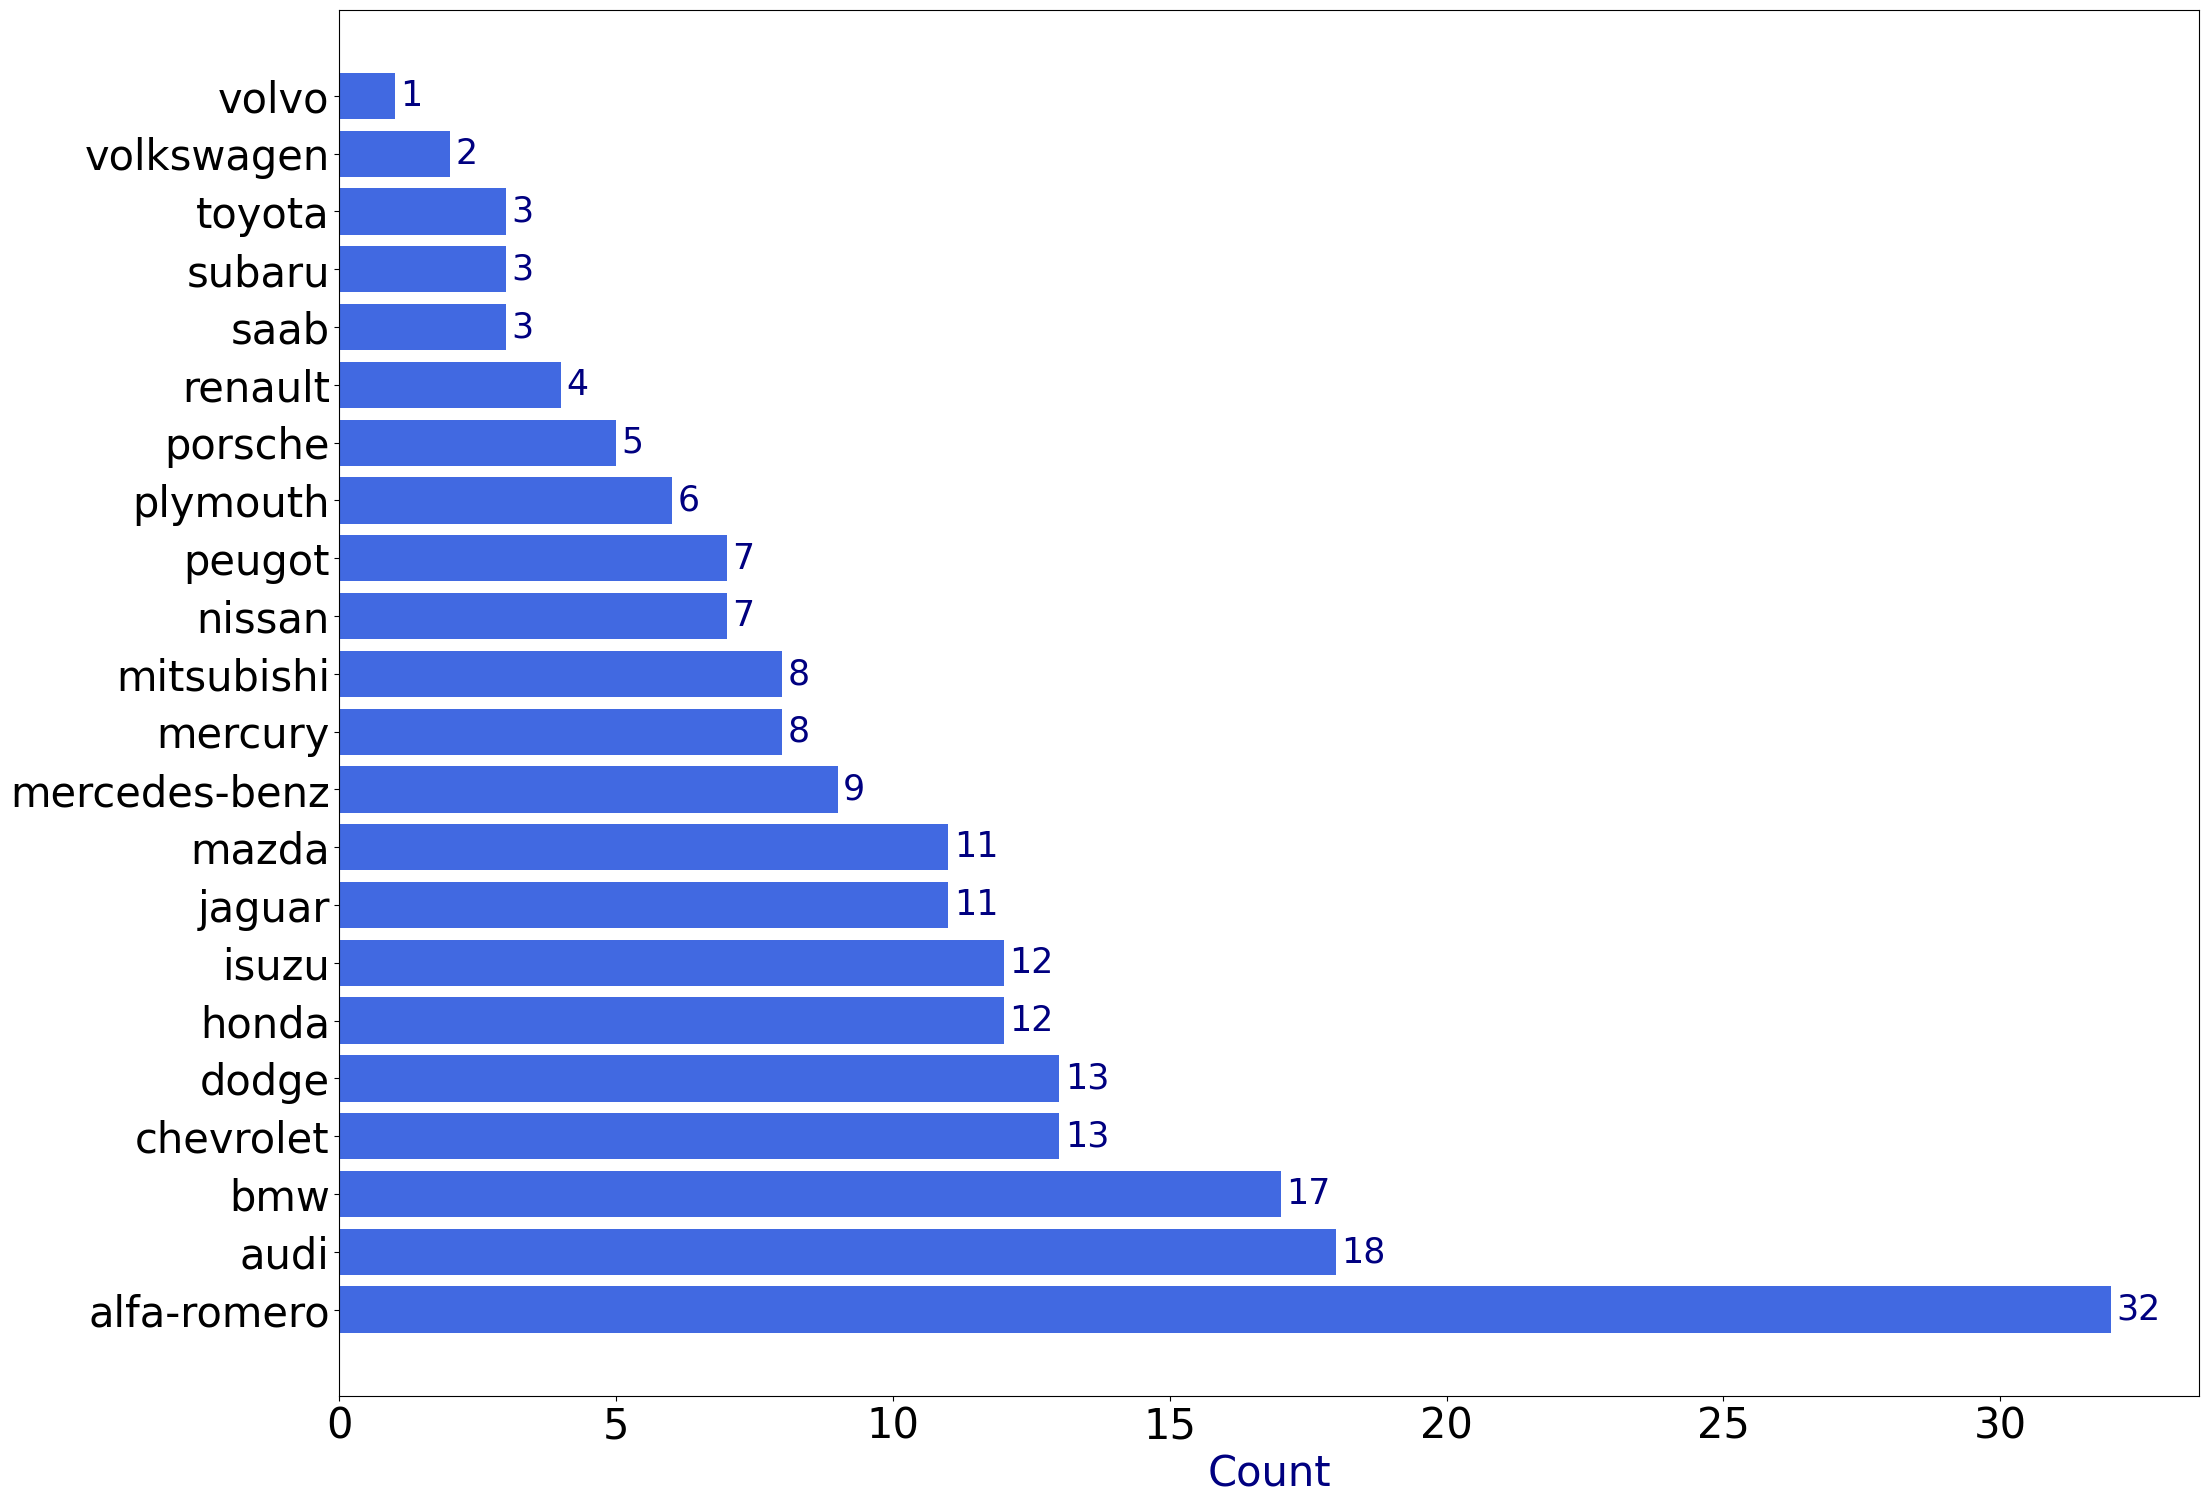

In [23]:
plt.figure(figsize=(24, 18))
bars = plt.barh(data['make'].unique(), data['make'].value_counts(), color="royalblue")
plt.yticks(fontsize=30, color='black')
plt.xlabel('Count', fontsize=30, color='navy')
plt.xticks(fontsize=30)

# Add values in front of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2.0, f'{int(width)}', 
             va='center', ha='left', fontsize=25, color='navy')

plt.show()

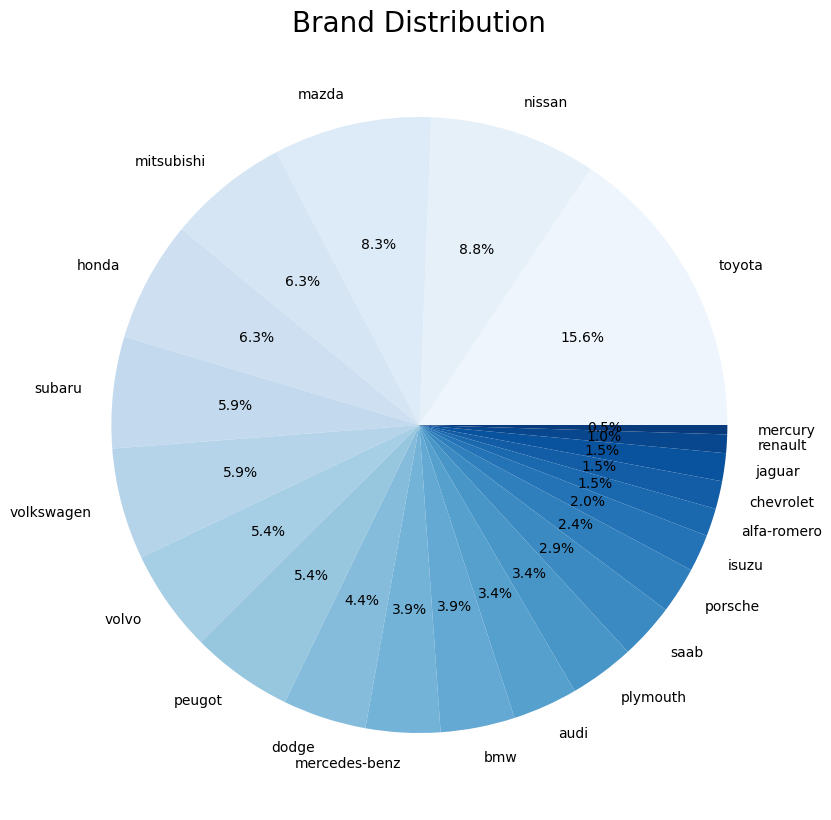

In [24]:
counts = data['make'].value_counts()
colors = sns.color_palette("Blues",(len(counts)))  # Use a colormap for distinct colors

plt.figure(figsize=(10, 10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Brand Distribution', fontsize=20)
plt.show()


#### ii) fuel_type

In [25]:
data['fuel_type'].value_counts()

fuel_type
gas       185
diesel     20
Name: count, dtype: int64

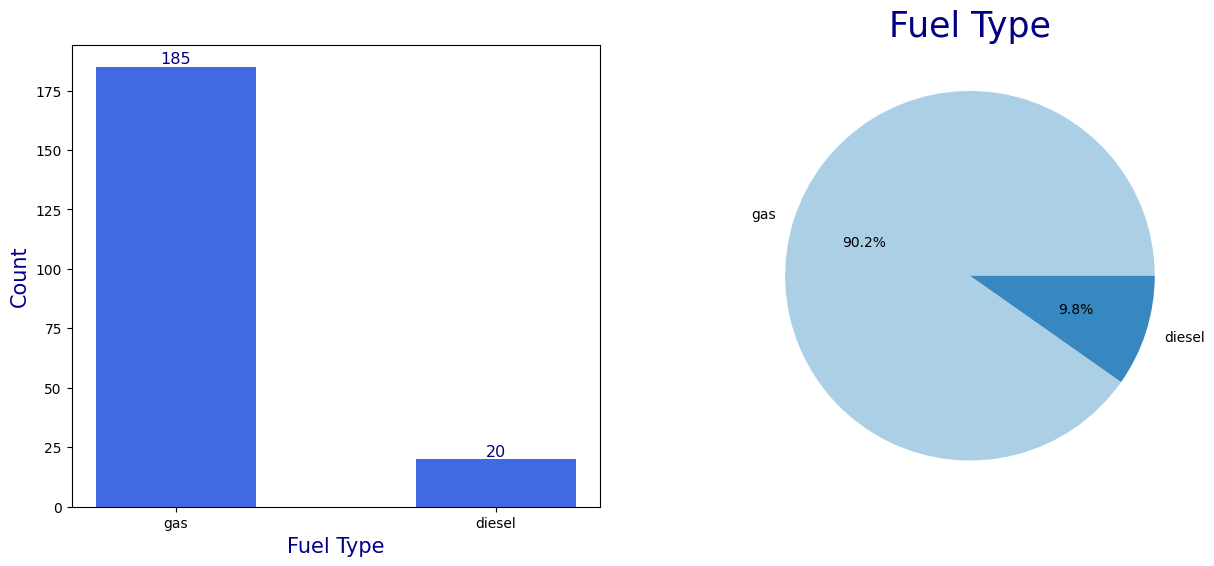

In [26]:
counts = data['fuel_type'].value_counts()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
bars = plt.bar(counts.index, counts.values, color="royalblue", width=0.5)
plt.xlabel('Fuel Type', fontsize=15, color='Darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11.5, color='navy')
plt.subplot(1,2,2)
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', colors = sns.color_palette('Blues', len(counts)))
plt.title("Fuel Type", fontsize = 25, color = "Navy")
plt.show()

#### iii) aspiration

In [27]:
data['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

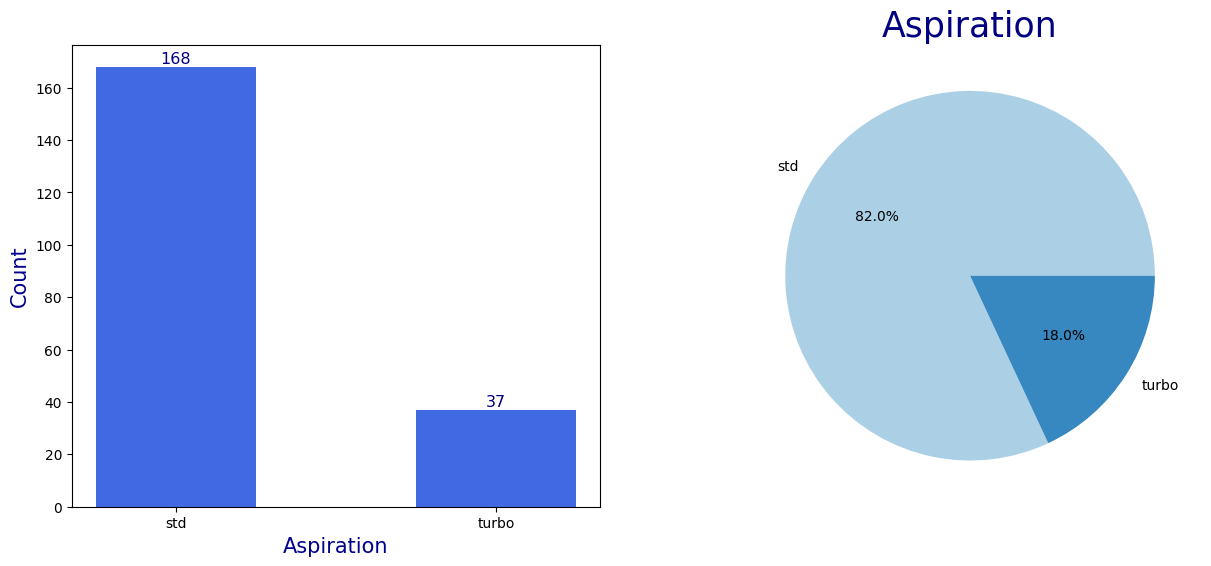

In [28]:
counts = data['aspiration'].value_counts()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
bars = plt.bar(counts.index, counts.values, color="royalblue", width=0.5)
plt.xlabel('Aspiration', fontsize=15, color='Darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11.5, color='navy')
plt.subplot(1,2,2)
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', colors = sns.color_palette('Blues', len(counts)))
plt.title("Aspiration", fontsize = 25, color = "Navy")
plt.show()

#### iv) num_of_doors

In [29]:
data['num_of_doors'].value_counts()

num_of_doors
four    116
two      89
Name: count, dtype: int64

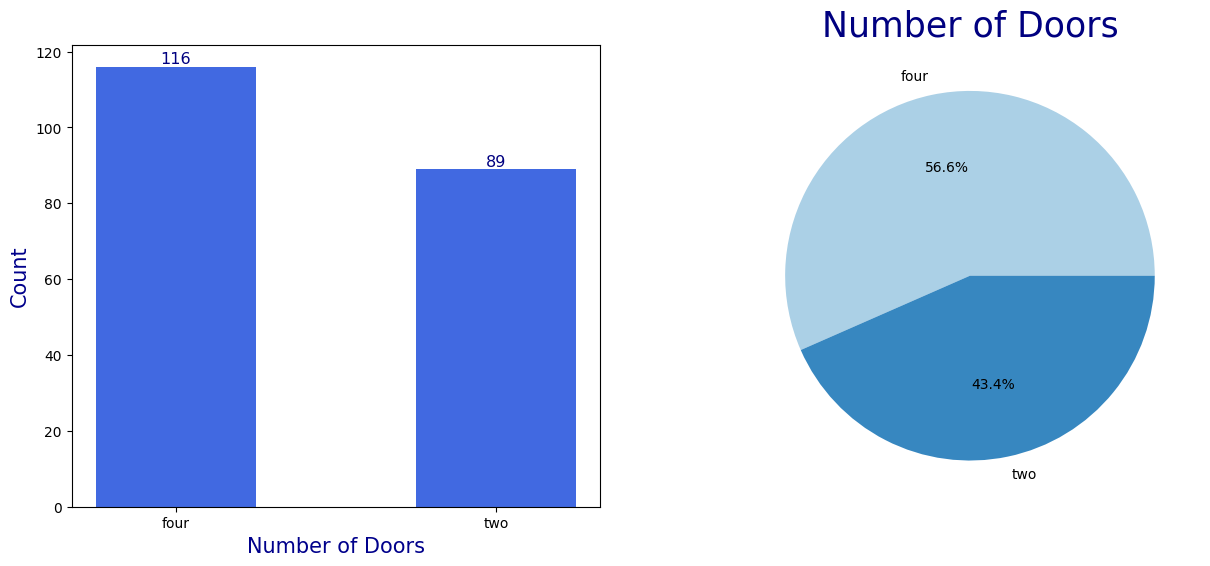

In [30]:
counts = data['num_of_doors'].value_counts()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
bars = plt.bar(counts.index, counts.values, color="royalblue", width=0.5)
plt.xlabel('Number of Doors', fontsize=15, color='Darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11.5, color='navy')
plt.subplot(1,2,2)
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', colors = sns.color_palette('Blues', len(counts)))
plt.title("Number of Doors", fontsize = 25, color = "Navy")
plt.show()

#### v) body_style

In [31]:
data['body_style'].value_counts()

body_style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

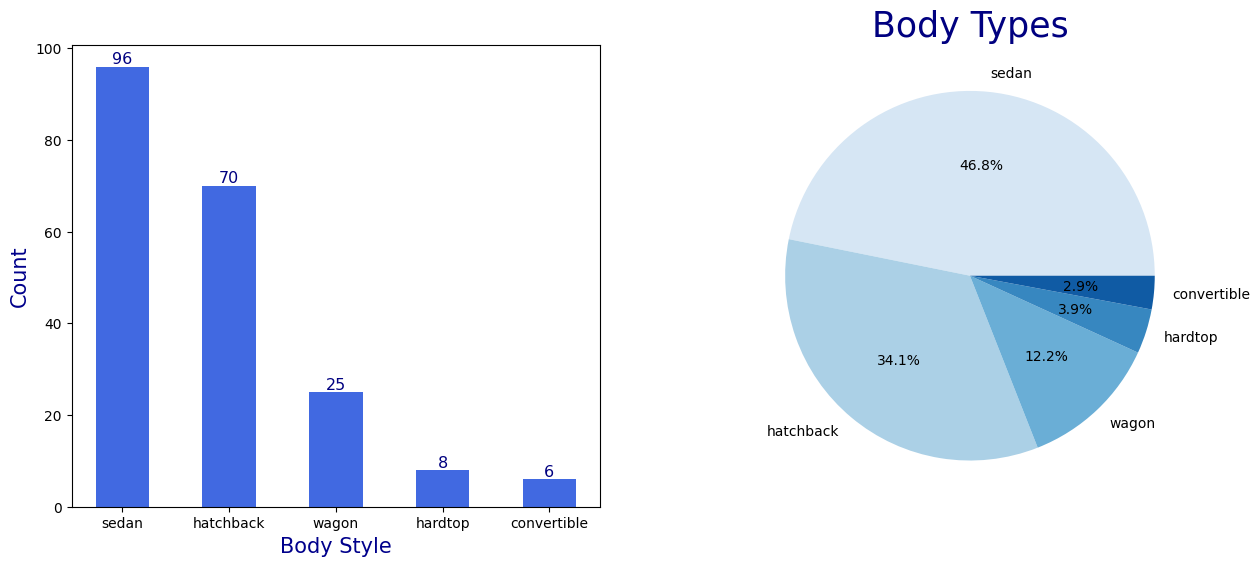

In [32]:
counts = data['body_style'].value_counts()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
bars = plt.bar(counts.index, counts.values, color="royalblue", width=0.5)
plt.xlabel('Body Style', fontsize=15, color='Darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11.5, color='navy')
plt.subplot(1,2,2)
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', colors = sns.color_palette('Blues', len(counts)))
plt.title("Body Types", fontsize = 25, color = "Navy")
plt.show()

#### vi) drive_wheels

In [33]:
data['drive_wheels'].value_counts()

drive_wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

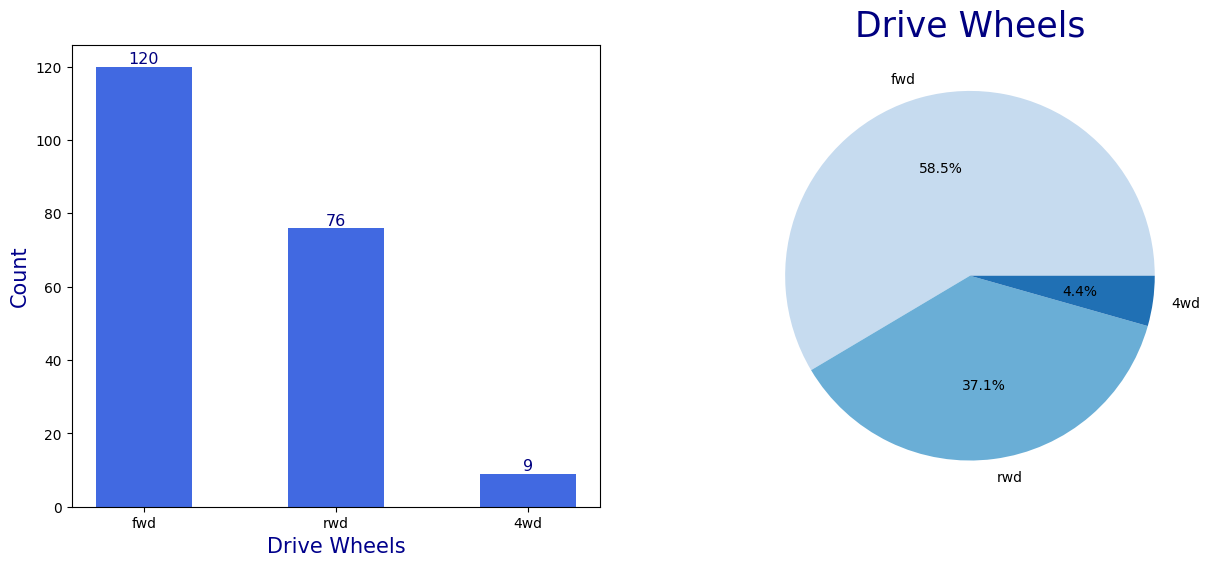

In [34]:
counts = data['drive_wheels'].value_counts()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
bars = plt.bar(counts.index, counts.values, color="royalblue", width=0.5)
plt.xlabel('Drive Wheels', fontsize=15, color='Darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11.5, color='navy')

plt.subplot(1,2,2)
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', colors = sns.color_palette('Blues', len(counts)))
plt.title("Drive Wheels", fontsize = 25, color = "Navy") 
plt.show()

#### vii) engine_location

In [35]:
data['engine_location'].value_counts()

engine_location
front    202
rear       3
Name: count, dtype: int64

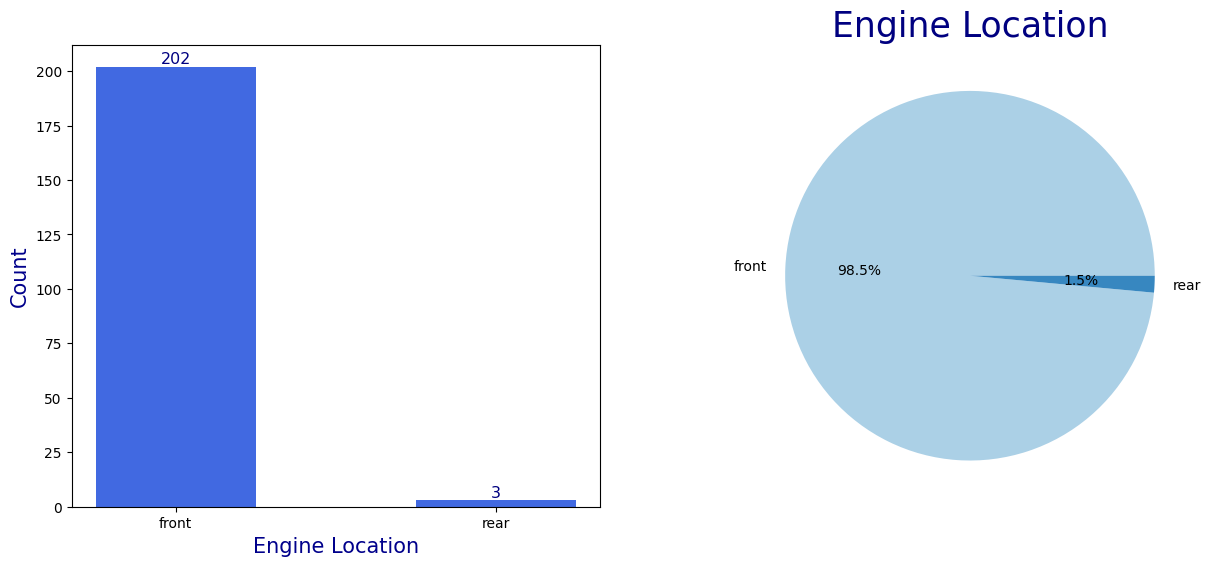

In [36]:
counts = data['engine_location'].value_counts()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
bars = plt.bar(counts.index, counts.values, color="royalblue", width=0.5)
plt.xlabel('Engine Location', fontsize=15, color='Darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11.5, color='navy')

plt.subplot(1,2,2)
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', colors = sns.color_palette('Blues', len(counts)))
plt.title("Engine Location", fontsize = 25, color = "Navy") 
plt.show()

#### viii) engine_type           

In [37]:
data['engine_type'].value_counts()

engine_type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

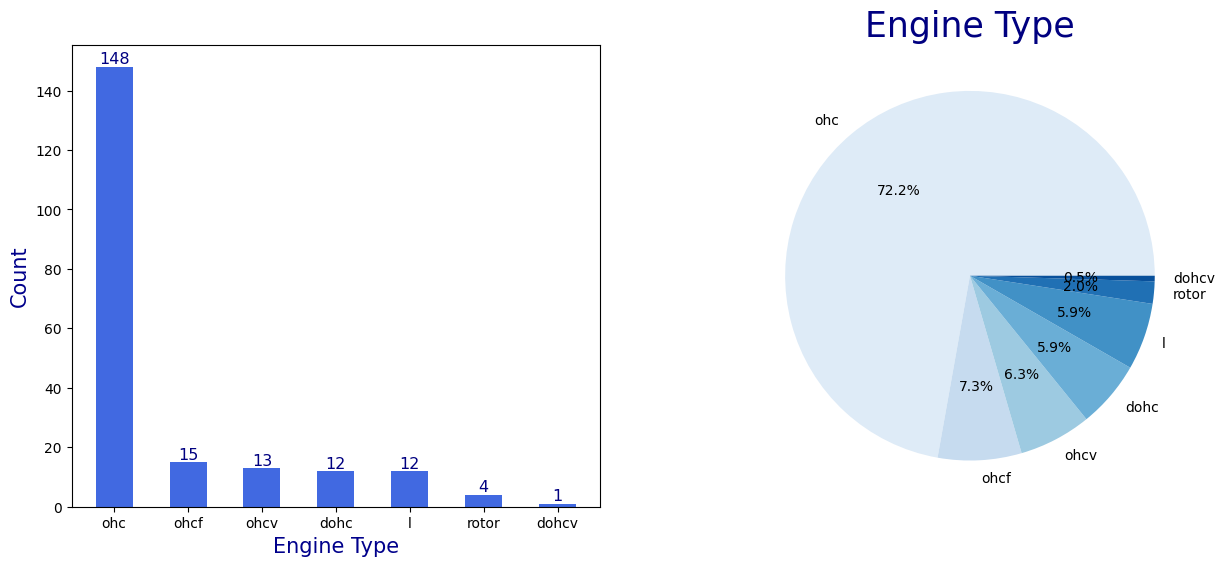

In [38]:
counts = data['engine_type'].value_counts()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
bars = plt.bar(counts.index, counts.values, color="royalblue", width=0.5)
plt.xlabel('Engine Type', fontsize=15, color='Darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11.5, color='navy')

plt.subplot(1,2,2)
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', colors = sns.color_palette('Blues', len(counts)))
plt.title("Engine Type", fontsize = 25, color = "Navy") 
plt.show()

#### ix) num_of_cylinders      

In [39]:
data['num_of_cylinders'].value_counts()

num_of_cylinders
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

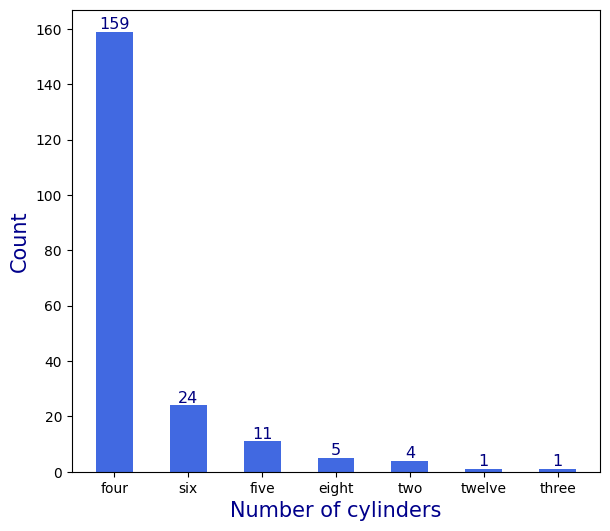

In [40]:
counts = data['num_of_cylinders'].value_counts()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
bars = plt.bar(counts.index, counts.values, color="royalblue", width=0.5)
plt.xlabel('Number of cylinders', fontsize=15, color='Darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11.5, color='navy')

#### x) fuel_system

In [41]:
data['fuel_system'].value_counts()

fuel_system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

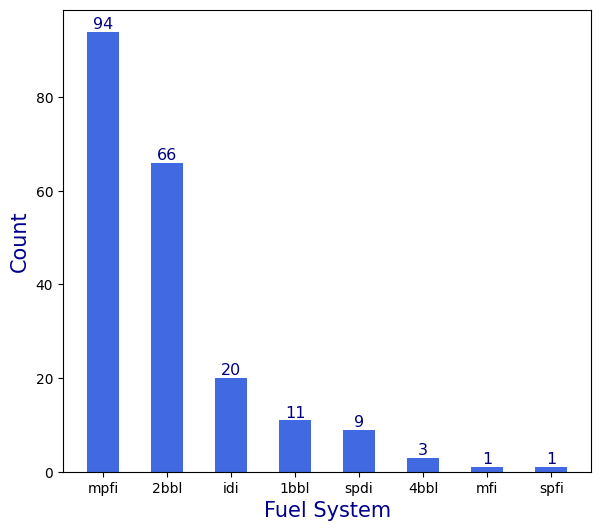

In [42]:
counts = data['fuel_system'].value_counts()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
bars = plt.bar(counts.index, counts.values, color="royalblue", width=0.5)
plt.xlabel('Fuel System', fontsize=15, color='Darkblue')
plt.ylabel('Count', fontsize=15, color='darkblue')
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11.5, color='navy')
plt.show()

### (II) NUMERICAL ANALYSIS

#### i) symboling

In [43]:
data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

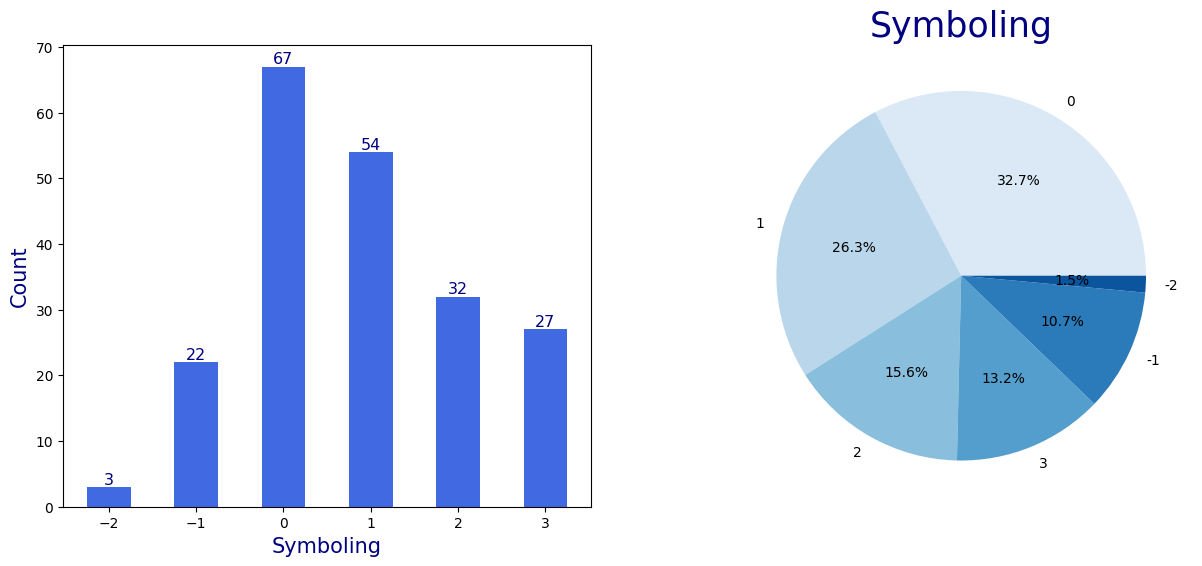

In [44]:
counts = data['symboling'].value_counts()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
bars = plt.bar(counts.index, counts.values, color="royalblue", width=0.5)
plt.xlabel('Symboling', fontsize=15, color='navy')
plt.ylabel('Count', fontsize=15, color='navy')
# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=11.5, color='navy')
plt.subplot(1,2,2)
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', colors = sns.color_palette('Blues', len(counts)))
plt.title("Symboling", fontsize = 25, color = "Navy") 
plt.show()

#### ii) normalized_losses, wheel_base

Text(0.5, 0, 'wheel_base')

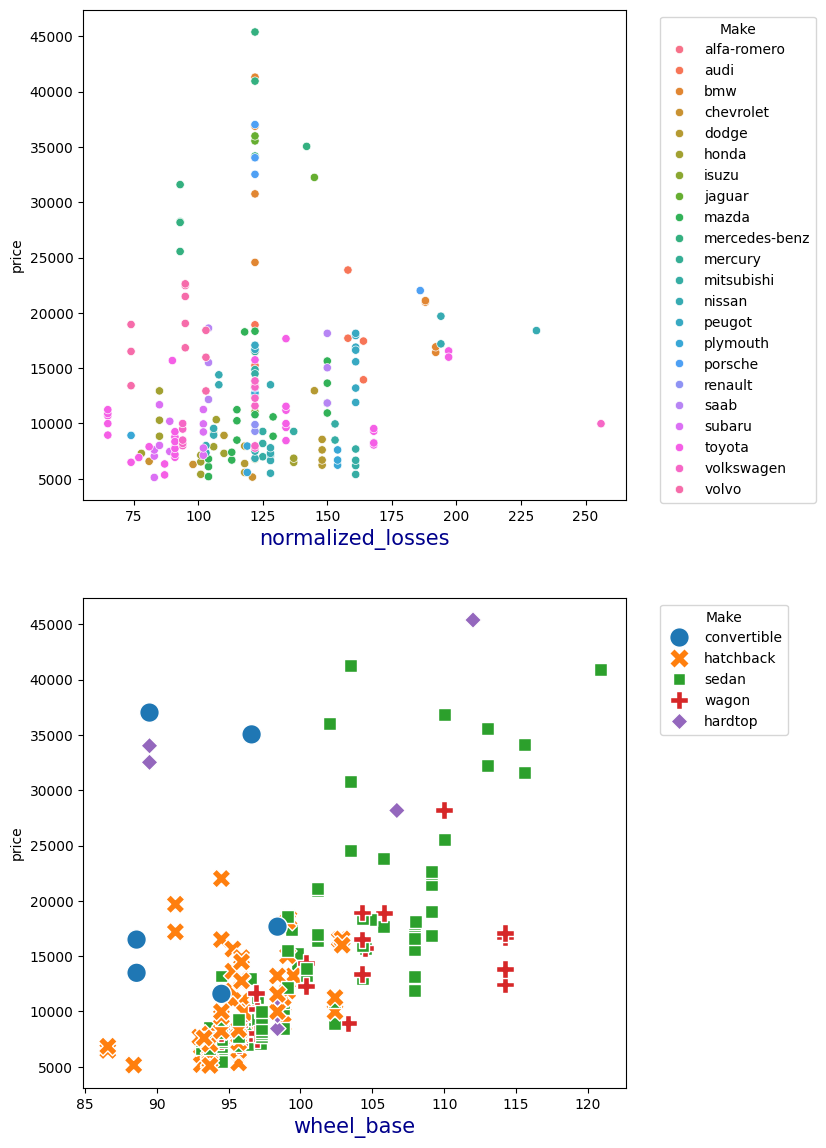

In [45]:
plt.figure(figsize = (7,14))

plt.subplot(2,1,1)
sns.scatterplot(x ='normalized_losses',y='price',data=data,hue ='make')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("normalized_losses", color = "Darkblue", fontsize = 15)

plt.subplot(2,1,2)
sns.scatterplot(x ='wheel_base',y='price',data=data,hue ='body_style', style ='body_style',size = "body_style",sizes = (150, 200))
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("wheel_base", color = "Darkblue", fontsize = 15)

#### iii)  length, width

Text(0.5, 0, 'width')

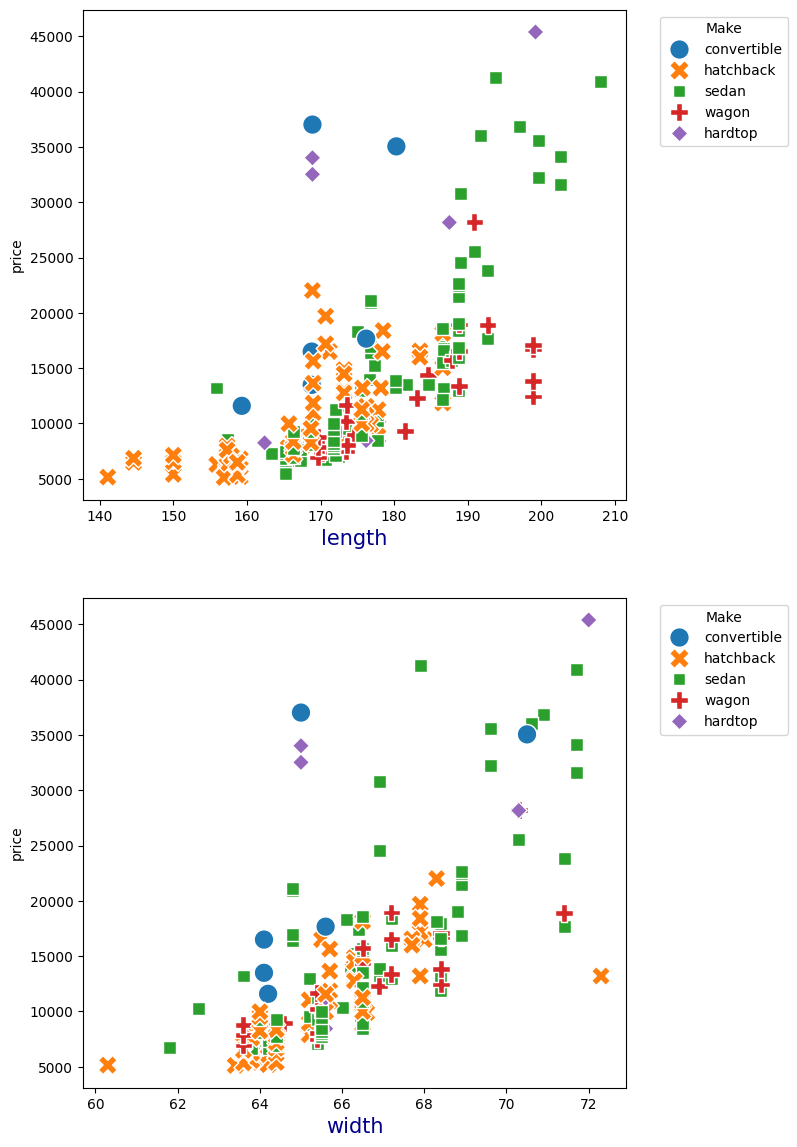

In [46]:
plt.figure(figsize = (7,14))

plt.subplot(2,1,1)
sns.scatterplot(x ='length',y='price',data=data,hue ='body_style', style ='body_style',size = "body_style",sizes = (150, 200))
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("length", color = "Darkblue", fontsize = 15)

plt.subplot(2,1,2)
sns.scatterplot(x ='width',y='price',data=data,hue ='body_style', style ='body_style',size = "body_style",sizes = (150, 200))
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("width", color = "Darkblue", fontsize = 15)

#### iv) curb_weight, engine_size

Text(0.5, 0, 'engine_size')

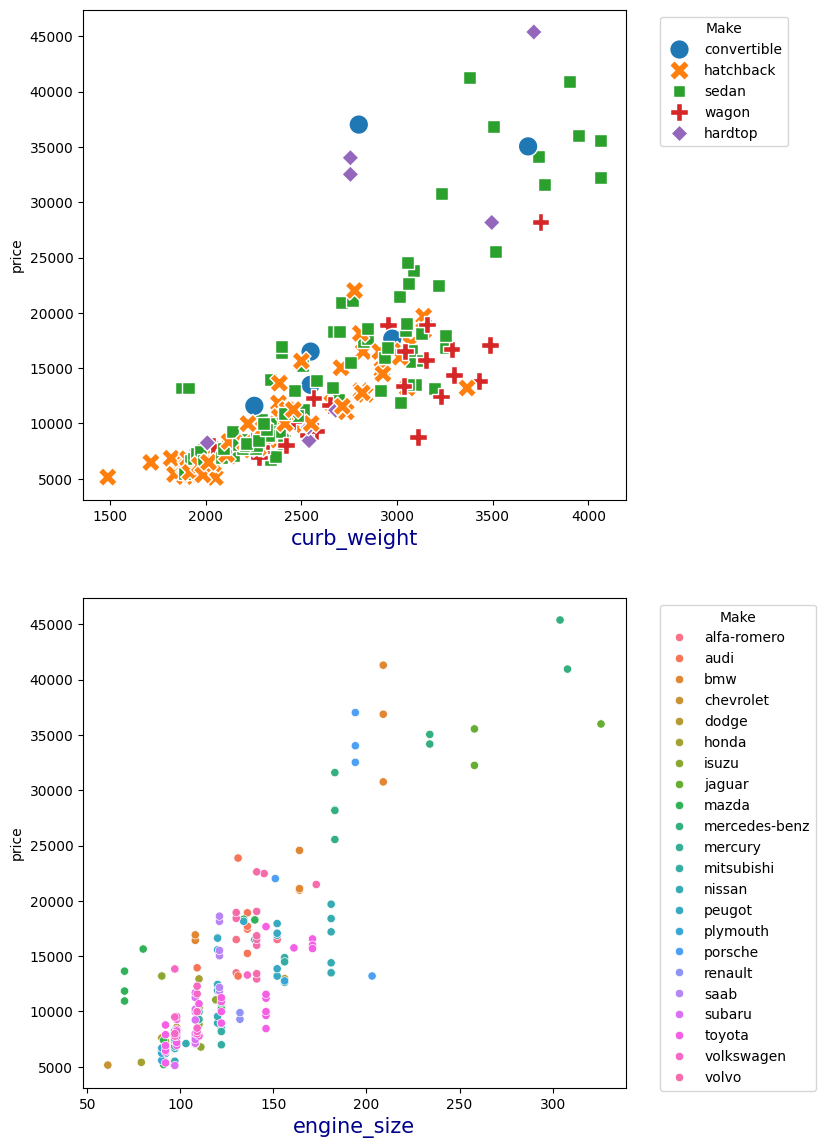

In [47]:
plt.figure(figsize = (7,14))

plt.subplot(2,1,1)
sns.scatterplot(x ='curb_weight',y='price',data=data,hue ='body_style', style ='body_style',size = "body_style",sizes = (150, 200))
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("curb_weight", color = "Darkblue", fontsize = 15)

plt.subplot(2,1,2)
sns.scatterplot(x ='engine_size',y='price',data=data,hue ='make')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("engine_size", color = "Darkblue", fontsize = 15)

#### v) bore, stroke

Text(0.5, 0, 'stroke')

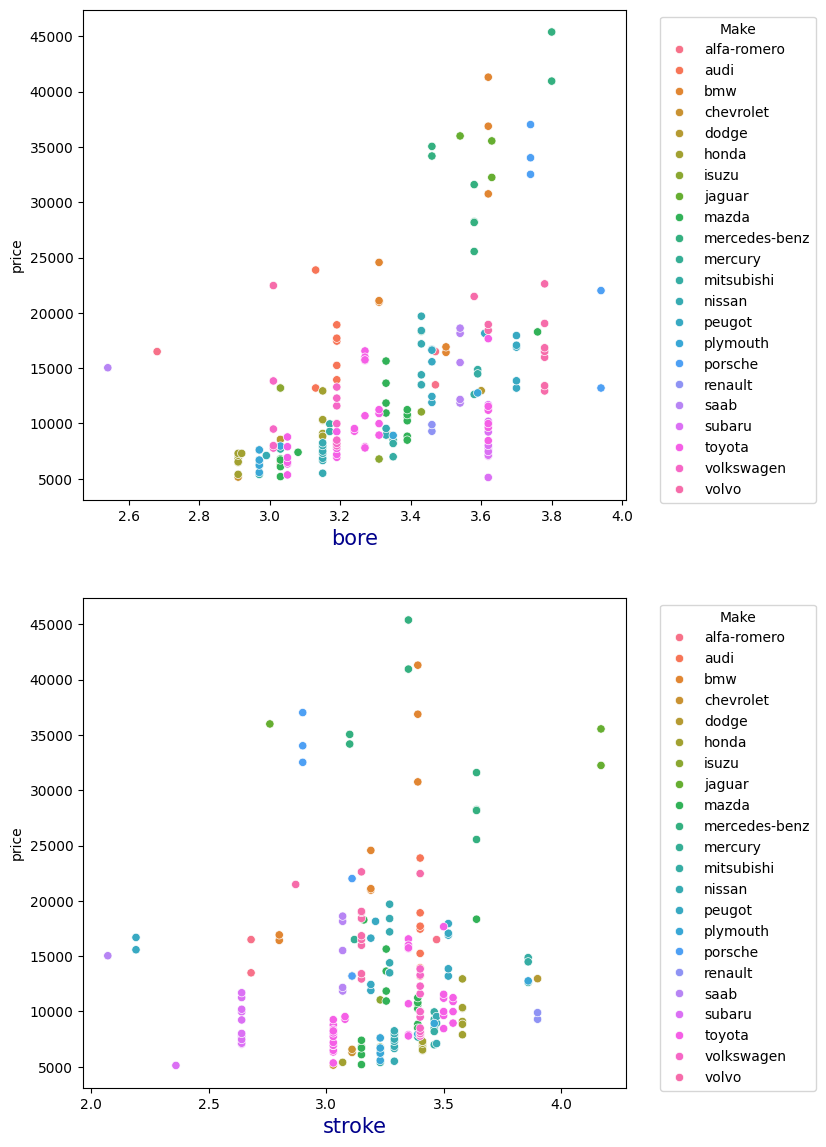

In [48]:
plt.figure(figsize = (7,14))

plt.subplot(2,1,1)
sns.scatterplot(x ='bore',y='price',data=data,hue ='make')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("bore", color = "Darkblue", fontsize = 15)

plt.subplot(2,1,2)
sns.scatterplot(x ='stroke',y='price',data=data,hue ='make')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("stroke", color = "Darkblue", fontsize = 15)

#### vi) compression_ratio, horsepower, peak_rpm

Text(0.5, 0, 'peak_rpm')

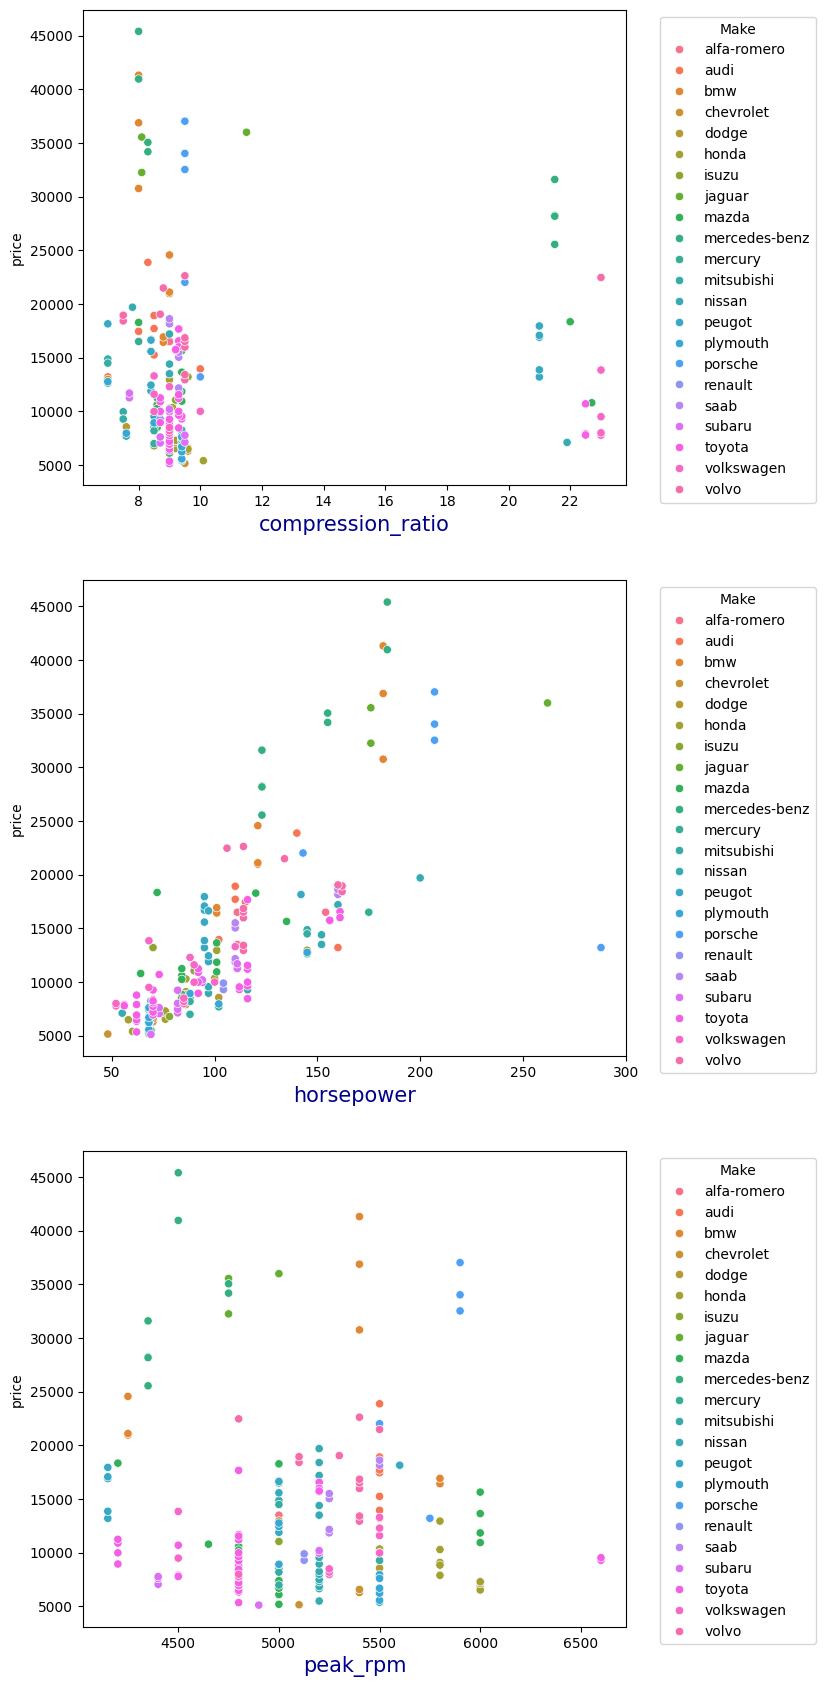

In [49]:
plt.figure(figsize = (7,21))

plt.subplot(3,1,1)
sns.scatterplot(x ='compression_ratio',y='price',data=data,hue ='make')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("compression_ratio", color = "Darkblue", fontsize = 15)

plt.subplot(3,1,2)
sns.scatterplot(x ='horsepower',y='price',data=data,hue ='make')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("horsepower", color = "Darkblue", fontsize = 15)

plt.subplot(3,1,3)
sns.scatterplot(x ='peak_rpm',y='price',data=data,hue ='make')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("peak_rpm", color = "Darkblue", fontsize = 15)

#### vii) city_mpg, highway_mpg

Text(0.5, 0, 'highway_mpg')

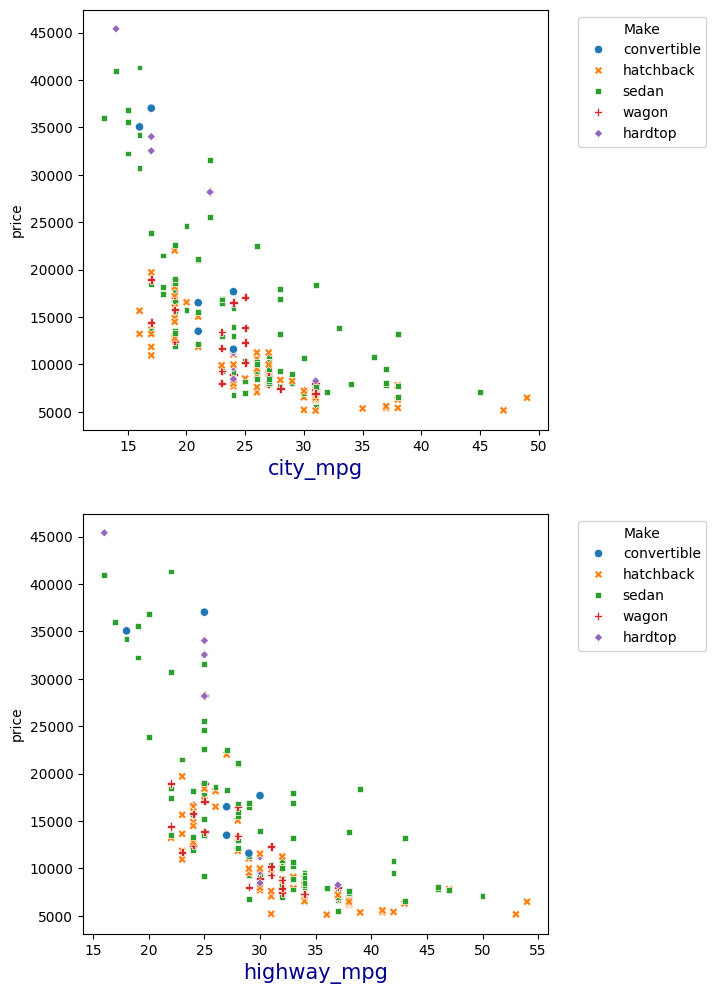

In [50]:
plt.figure(figsize = (6,12))

plt.subplot(2,1,1)
sns.scatterplot(x ='city_mpg',y='price',data=data,hue ='body_style', style = "body_style")
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("city_mpg", color = "Darkblue", fontsize = 15)

plt.subplot(2,1,2)
sns.scatterplot(x ='highway_mpg',y='price',data=data,hue ='body_style', style = "body_style")
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xlabel("highway_mpg", color = "Darkblue", fontsize = 15)

In [51]:
data.columns[data.dtypes != 'object'].tolist()

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

<Figure size 1600x900 with 0 Axes>

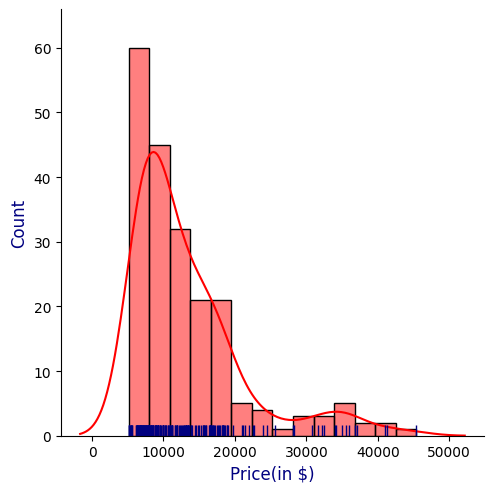

In [52]:
plt.figure(figsize = (16,9))
sns.displot(data['price'], stat = 'count', kde = True, kde_kws = dict(cut = 2.5),color = "Red")
plt.xlabel("Price(in $)", fontsize = 12, color = "navy")
plt.ylabel("Count", fontsize = 12, color = "navy")
sns.rugplot(data, x = 'price', color = "navy")
plt.show()

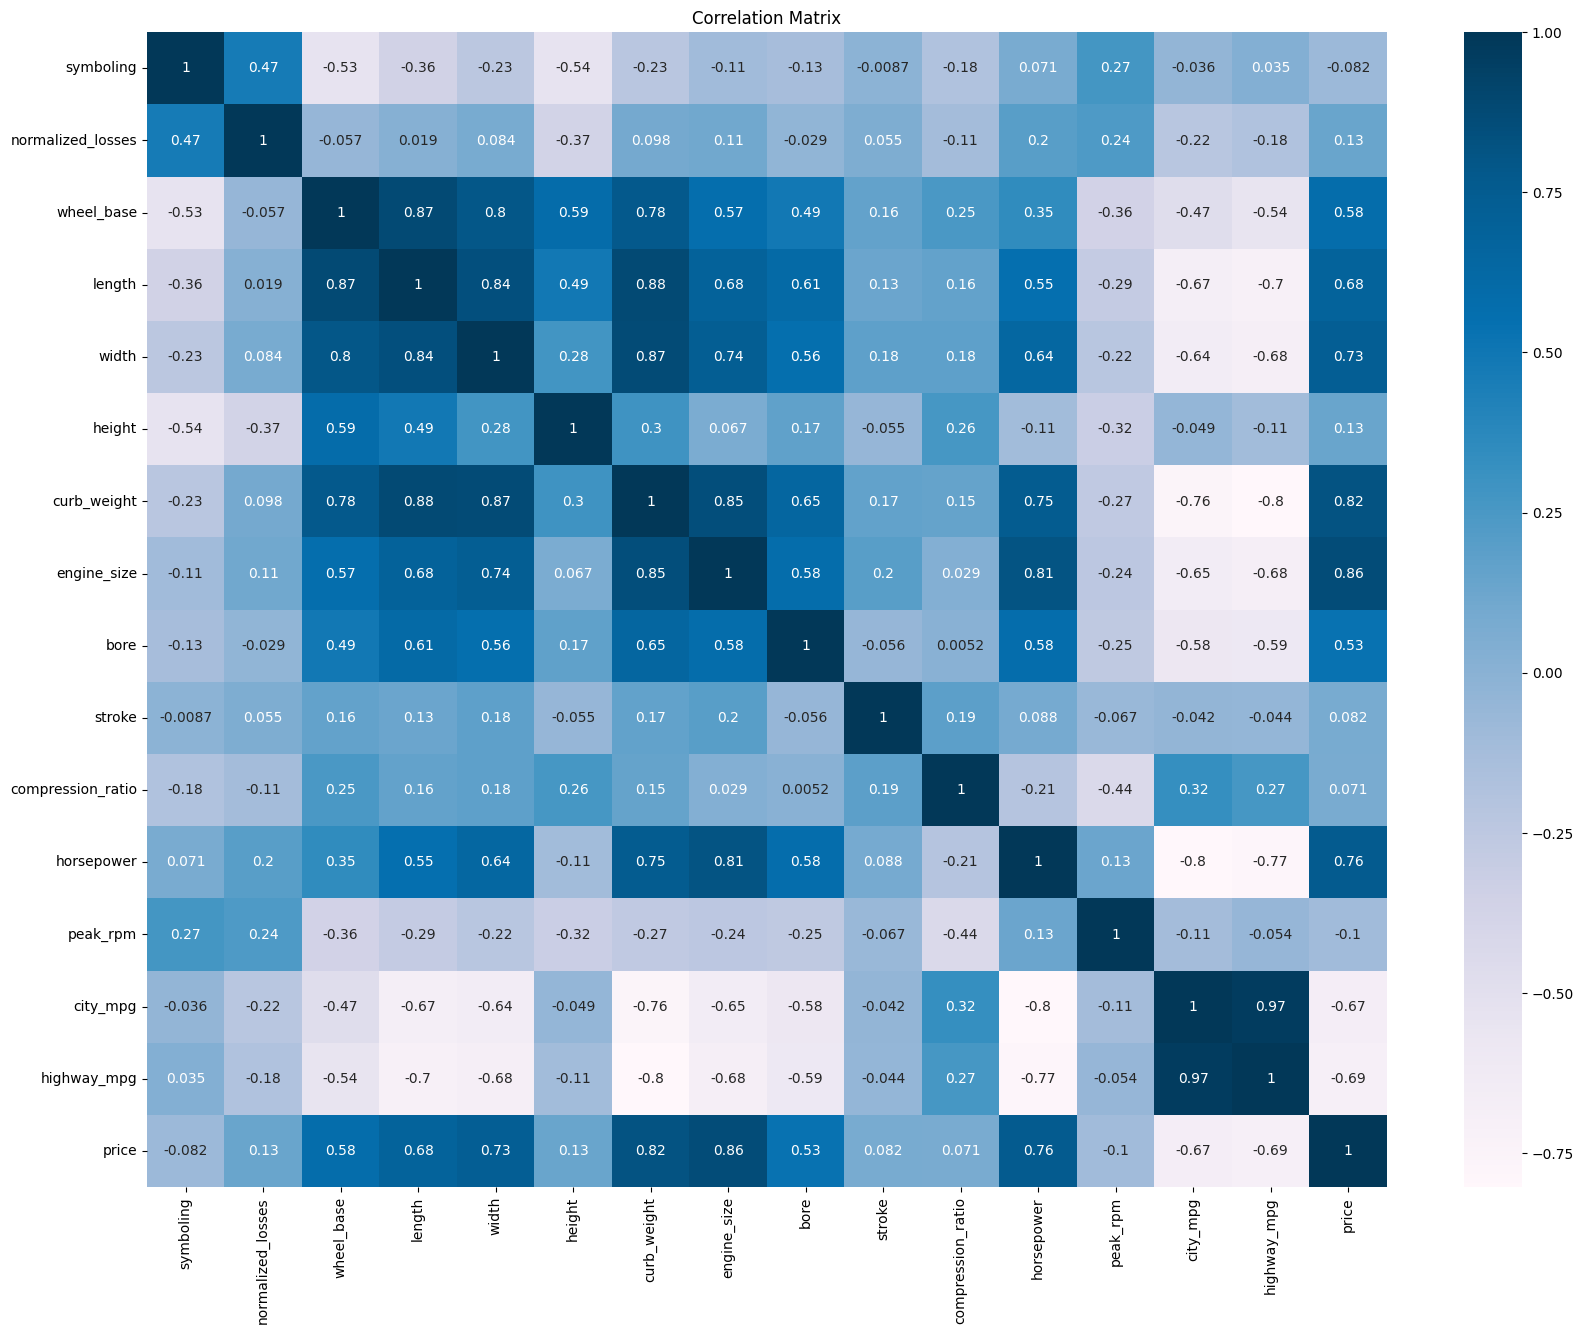

In [53]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
c = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(c, cmap="PuBu", annot=True)
plt.title('Correlation Matrix')
plt.show()

### 6. Download new dataset

In [54]:
data.to_csv("Cleaned Car Data.csv")

## 7. Model Training

In [55]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [86]:
x = data[['engine_size','city_mpg']]
y = data.price

In [57]:
x

,engine_size,city_mpg
0,130,21
1,130,21
2,152,19
3,109,24
4,136,18
...,...,...
200,141,23
201,141,19
202,173,18
203,145,26


In [58]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

### Cross-Validation

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [60]:
print(x_train.shape, x_test.shape)

(164, 2) (41, 2)


#### 7.1 Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()

In [62]:
linearModel.fit(x_train, y_train)

LinearRegression()

##### 7.1.1 Making prediction using linear model

In [63]:
print("prediction: ",linearModel.predict(x_test[0:4]))
print("actual data: ", y_test[0:5].values.flatten())

prediction:  [11514.69734816 30130.64344608 16835.19917561  9036.09475666]
actual data:  [ 9279. 35056. 17075.  7898.  8058.]


##### 7.1.2 checking accuracy

In [64]:
linearModel.score(x_test, y_test) * 100

87.18699985612174

#### 7.2 Polynomial Regression

##### 7.2.1 degree 2 - fitting data in quadratic form

In [65]:
from sklearn.preprocessing import PolynomialFeatures
quad_reg = PolynomialFeatures(degree = 2)

In [66]:
x_deg2 = quad_reg.fit_transform(x)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_deg2, y, test_size = 0.2)
print(x_train2.shape, x_test2.shape)

(164, 6) (41, 6)


In [67]:
x_train2[0:5]

array([[1.0000e+00, 1.5200e+02, 2.5000e+01, 2.3104e+04, 3.8000e+03,
        6.2500e+02],
       [1.0000e+00, 9.1000e+01, 3.1000e+01, 8.2810e+03, 2.8210e+03,
        9.6100e+02],
       [1.0000e+00, 1.7300e+02, 1.8000e+01, 2.9929e+04, 3.1140e+03,
        3.2400e+02],
       [1.0000e+00, 1.4100e+02, 2.3000e+01, 1.9881e+04, 3.2430e+03,
        5.2900e+02],
       [1.0000e+00, 1.4100e+02, 1.9000e+01, 1.9881e+04, 2.6790e+03,
        3.6100e+02]])

##### 7.2.2 Training quadratic model

In [68]:
quad_model = LinearRegression()
quad_model.fit(x_train2, y_train2)

LinearRegression()

In [69]:
print("prediction: ",quad_model.predict(x_test2[0:4]))
print("actual data: ", y_test2[0:5].values.flatten())

prediction:  [ 6072.0989964  14438.1093265  11231.37669839 51485.04560377]
actual data:  [ 6295. 16900. 10245. 36000.  9959.]


##### 7.2.3 Check accuracy

In [70]:
quad_model.score(x_test2, y_test2) * 100

74.52307912023385

### Low Accuracy with linear and polynomial models

### 7.3 Decision Tree 

In [71]:
print(np.shape(x_train), np.shape(x_test))

(164, 2) (41, 2)


In [72]:
from sklearn.tree import DecisionTreeRegressor

##### 7.2.2 Training Decision Tree model

In [73]:
decisionTreeModel = DecisionTreeRegressor(criterion = 'friedman_mse')
decisionTreeModel.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [74]:
print("prediction: ",decisionTreeModel.predict(x_test[0:5]))
print("actual data: ", y_test[0:5].values.flatten())

prediction:  [ 9279. 33900. 13860. 10795.  8238.]
actual data:  [ 9279. 35056. 17075.  7898.  8058.]


In [75]:
decisionTreeModel.score(x_test, y_test) * 100

85.24044418089353

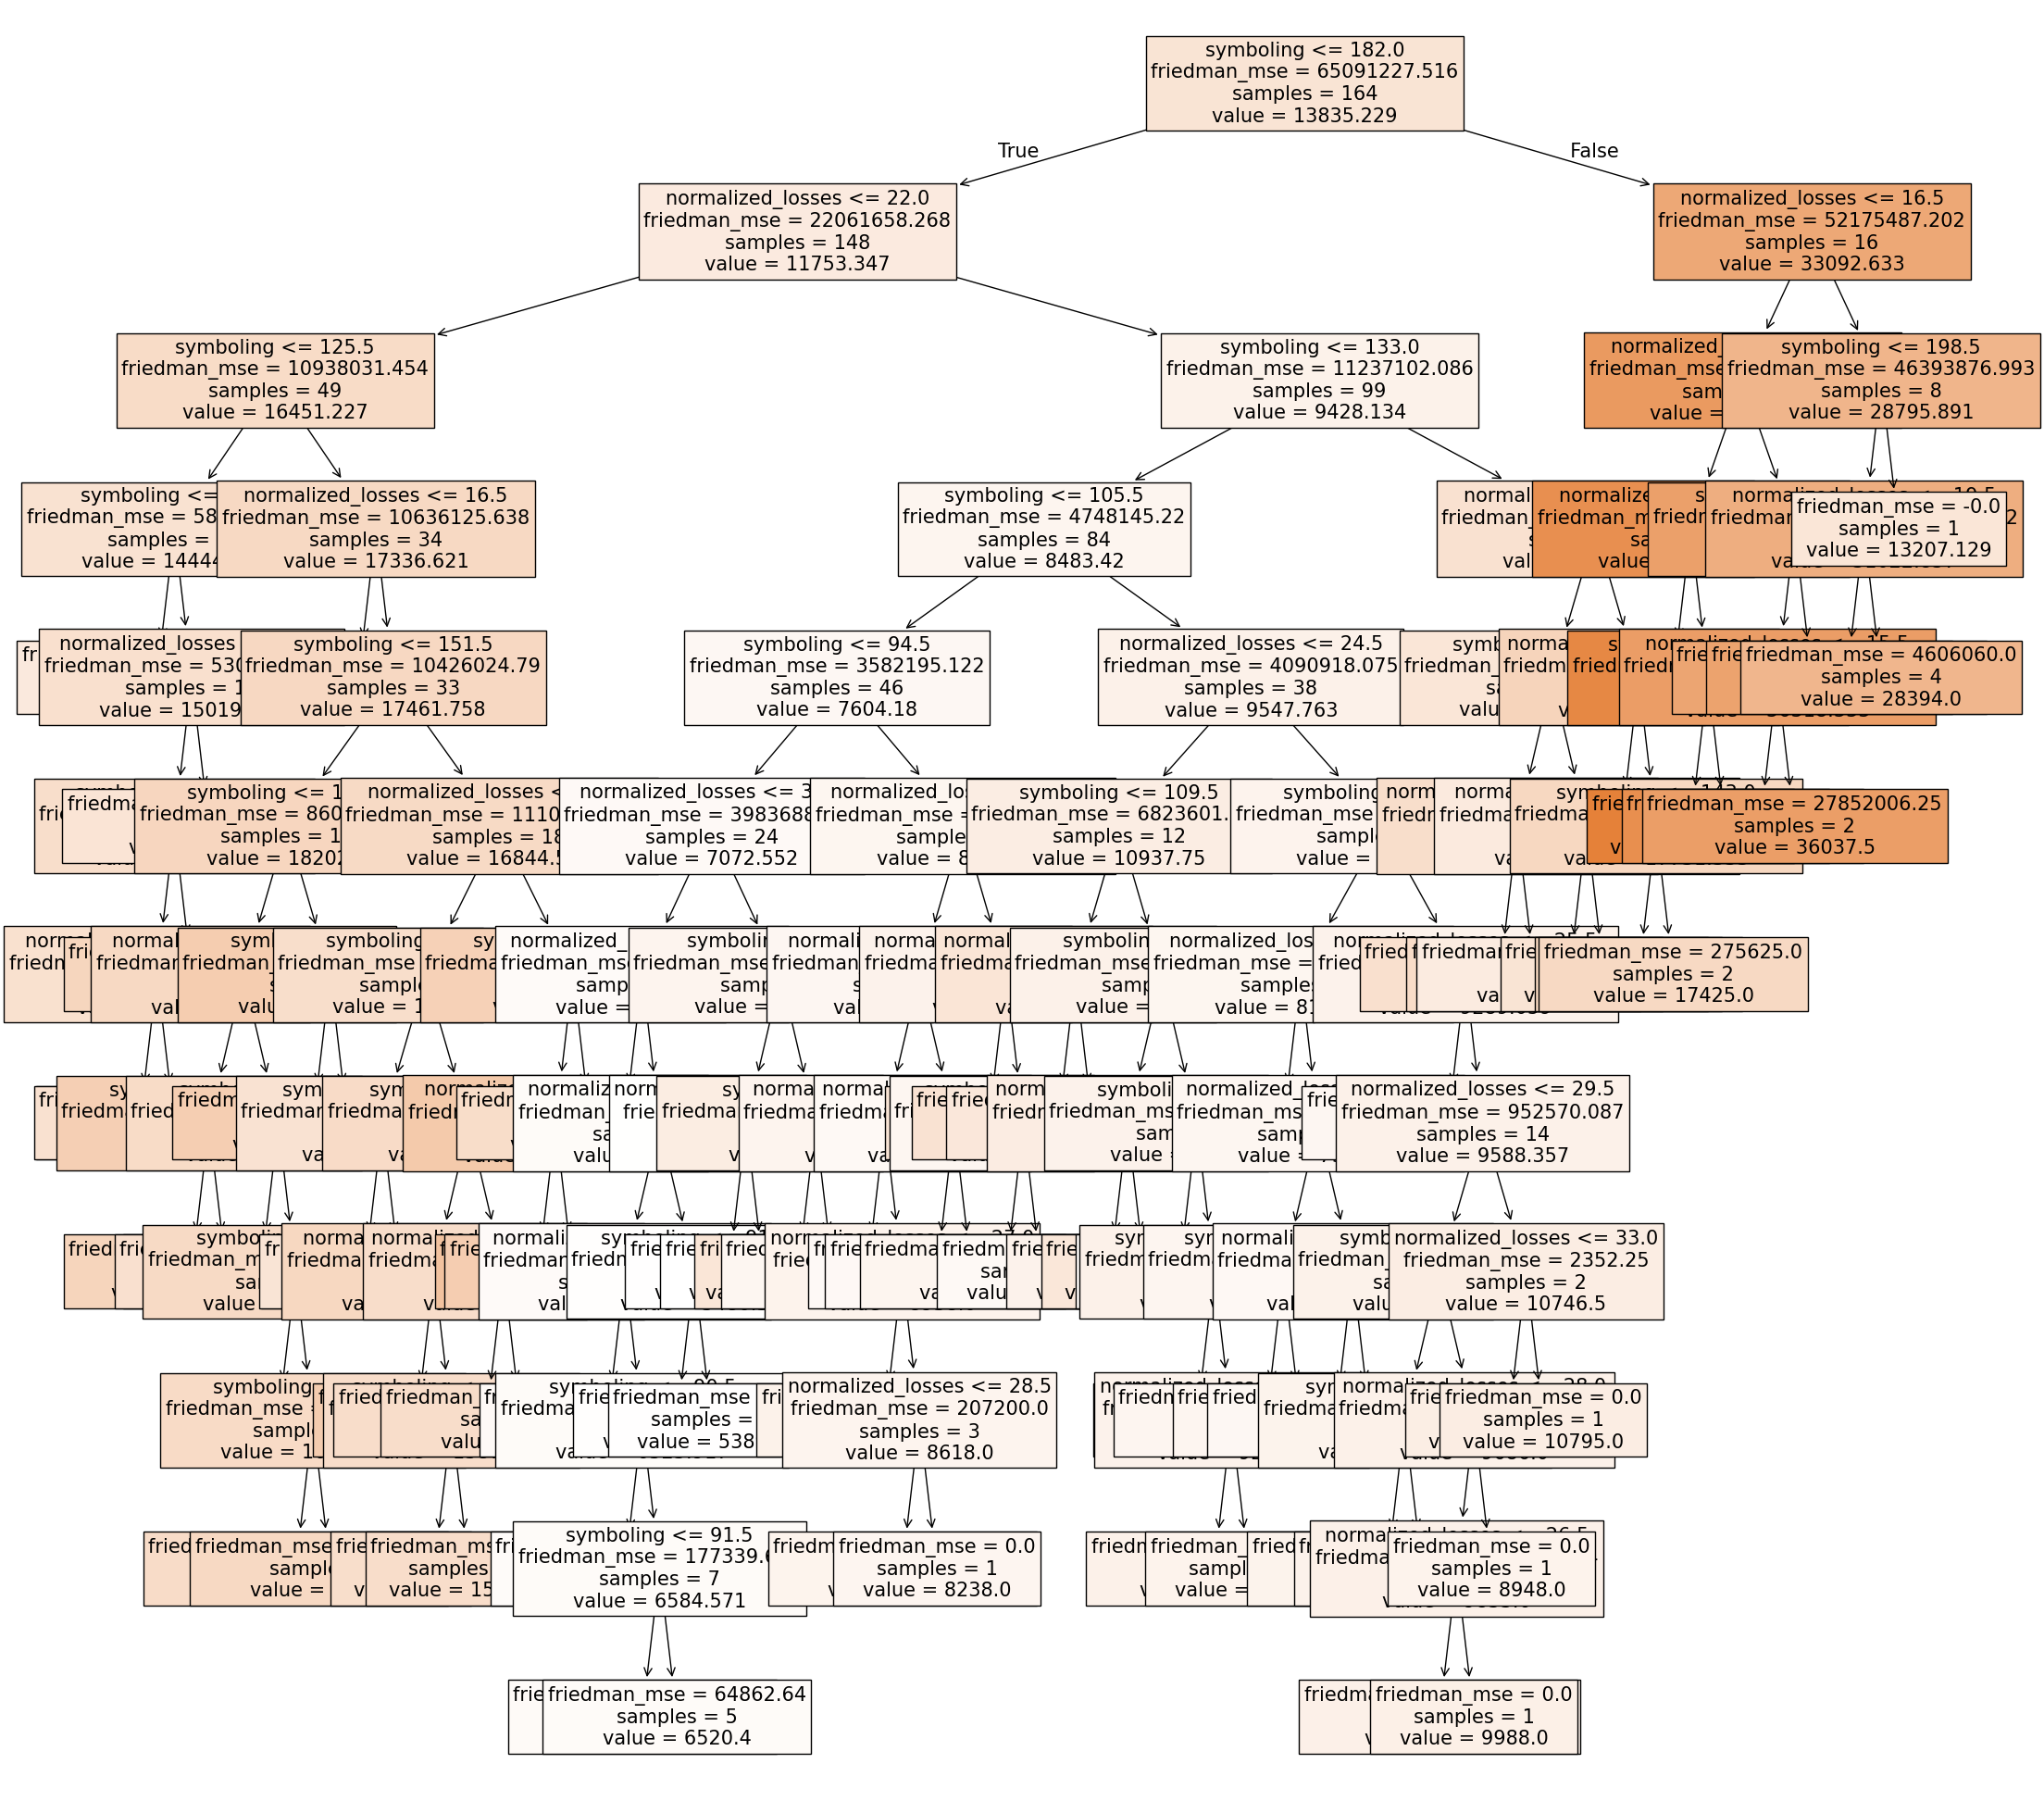

In [76]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(decisionTreeModel, filled = True, fontsize = 15, feature_names=data.columns)
plt.show()

### Applying Random Forest Algo

In [77]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=1000, criterion='friedman_mse')

In [78]:
forest_regressor.fit(x_train, y_train)

RandomForestRegressor(criterion='friedman_mse', n_estimators=1000)

In [79]:
print("predicted: ", forest_regressor.predict(x_test[0:5]))
print("actual data: ", y_test[0:5].values.flatten())

predicted:  [10938.39796677 34668.97487136 13426.57796573 11083.09741374
  8379.29295996]
actual data:  [ 9279. 35056. 17075.  7898.  8058.]


In [80]:
forest_regressor.score(x_test, y_test) * 100

87.86352643321626

## Results with Regression

In [81]:
print("Linear Regression: ", linearModel.score(x_test, y_test) * 100, "%", sep = "")
print("Poly Regression degree=2: ", quad_model.score(x_test2, y_test2) * 100, "%", sep = "")
print("Decision Tree Regressor: ", decisionTreeModel.score(x_test, y_test) * 100, "%", sep = "")
print("Random Forest Regressor: ", forest_regressor.score(x_test, y_test) * 100, "%", sep = "")

Linear Regression: 87.18699985612174%
Poly Regression degree=2: 74.52307912023385%
Decision Tree Regressor: 85.24044418089353%
Random Forest Regressor: 87.86352643321626%


### We are getting best accuracy using the Random Forest Algorithm
### Pridiction will be done using Random Forest

# ------Saving Model Using Pickle Library------

In [82]:
# pickle: This is a Python module used for serializing and deserializing
#  Python objects. Serialization is the process of converting an object 
# into a byte stream, and deserialization is the reverse process of
# reconstructing the object from the byte stream.
# pickle.dump(): This function is used to serialize the model_fit 
# object and write it to a file.
# model_fit: This is the object that you want to serialize and save.
# It could be any Python object such as a model, a list, a dictionary, etc.
# open('model123.pkl', 'wb'): This part opens a file named 'model123.pkl' 
# in binary write mode. The 'wb' mode indicates that the file should be
# opened for writing in binary mode. Binary mode is used because pickle
#  writes binary data to the file.

In [85]:
import pickle

# Assuming car_price_detection is the trained model
with open('car_price_detection.pkl', 'wb') as model_file:
    pickle.dump(forest_regressor, model_file)
